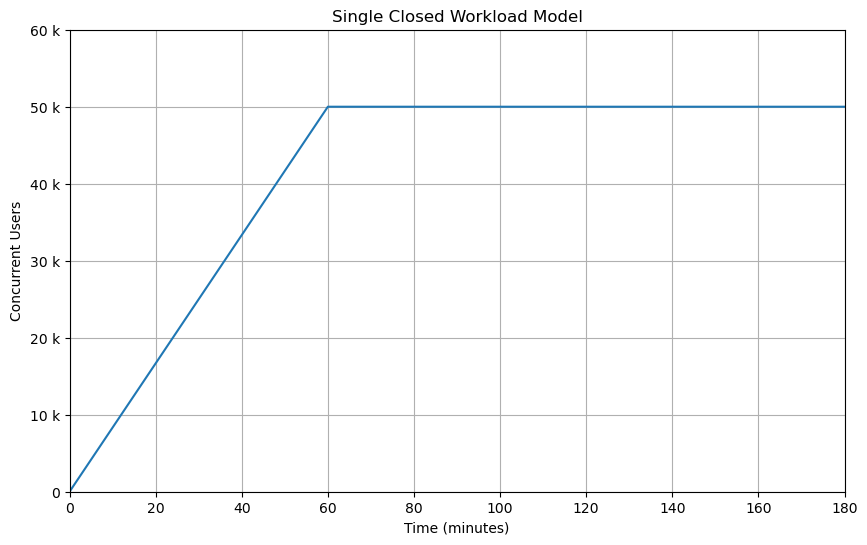

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
L = 50000  # Total User Target
ramp_time = 60  # Ramp Time
simulation_time = 180  # Simulation Time

# Define the time points to evaluate the function at
t = np.linspace(0, simulation_time, 1000)

# Define the step function
def step_function(t, L, ramp_time):
    return np.clip(t * (L / ramp_time), 0, L)

# Calculate the number of users at each time point
users = step_function(t, L, ramp_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, users)

ax = plt.gca()
formatter = ticker.EngFormatter()
formatter.ENG_PREFIXES[-6] = 'K'
ax.yaxis.set_major_formatter(formatter)

plt.title('Single Closed Workload Model')
plt.xlabel('Time (minutes)')
plt.ylabel('Concurrent Users')
plt.grid(True)

plt.xlim(0, simulation_time)
plt.ylim(0, L + 10000)

plt.show()

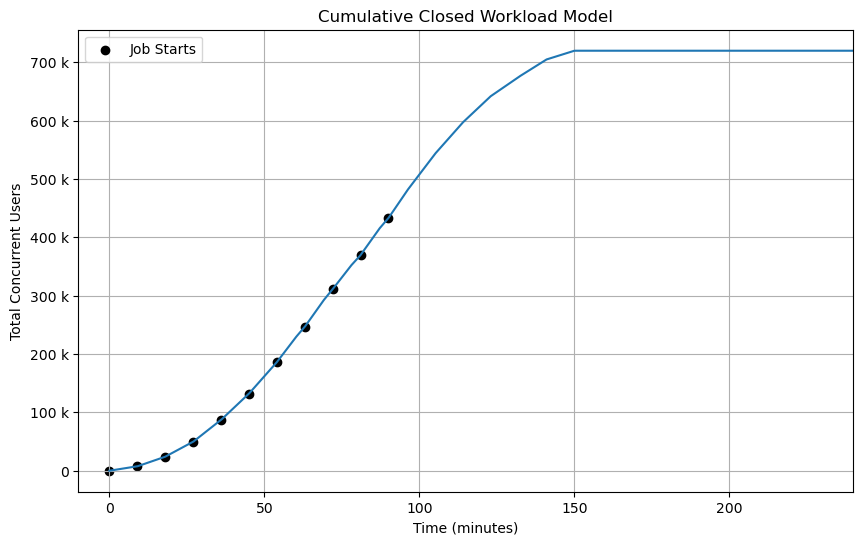

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the shared parameters
ramp_time = 60  # Ramp Time
simulation_time = 240  # Simulation Time

# Define the time points to evaluate the function at
t = np.linspace(0, simulation_time, 1000)

# Define the step function
def step_function(t, L, ramp_time, start_time):
    users = np.clip((t - start_time) * (L / ramp_time), 0, L)
    users[t < start_time] = 0  # Set the number of users to 0 before the start time
    return users

# Define the Total User Targets and start times for the three jobs
L_values = [50000, 60000, 60000, 
            80000, 50000, 60000, 
            60000, 80000, 20000, 
            100000, 100000]

start_times = [i*9 for i in range(11)]  # Start times (starts every 9 minutes)

# Calculate the total number of users at each time point for all jobs
total_users = np.zeros_like(t)
for L, start_time in zip(L_values, start_times):
    users = step_function(t, L, ramp_time, start_time)
    total_users += users

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, total_users)

# Add markers at the start of each closed workload model
marker_y_values = [total_users[np.argmin(np.abs(t - start_time))] for start_time in start_times]
plt.scatter(start_times, marker_y_values, marker='o', color='black', label='Job Starts')

ax = plt.gca()
formatter = ticker.EngFormatter()
formatter.ENG_PREFIXES[-6] = 'K'
ax.yaxis.set_major_formatter(formatter)

plt.title('Cumulative Closed Workload Model')
plt.xlabel('Time (minutes)')
plt.ylabel('Total Concurrent Users')
plt.grid(True)
plt.xlim(-10, simulation_time)
plt.legend()
plt.show()


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

# Define the adjusted logistic function
def adjusted_logistic_function(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0))) - L / (1 + np.exp(k * t0))

# Define the shared parameters
ramp_time = 60  # Ramp Time
simulation_time = 180  # Simulation Time

# Define the time points to evaluate the function at
t = np.linspace(0, simulation_time, 1000)

# Define the step function
def step_function(t, L, ramp_time, start_time):
    users = np.clip((t - start_time) * (L / ramp_time), 0, L)
    users[t < start_time] = 0  # Set the number of users to 0 before the start time
    return users

# Define the Total User Targets and start times for the three jobs
L_values = [50000, 60000, 60000, 
            80000, 50000, 60000, 
            60000, 80000, 20000, 
            100000, 100000]

start_times = [i*9 for i in range(11)]  # Start times (starts every 9 minutes)

# Calculate the total number of users at each time point for all jobs
total_users = np.zeros_like(t)
for L, start_time in zip(L_values, start_times):
    users = step_function(t, L, ramp_time, start_time)
    total_users += users

# Provide initial guesses for the parameters L, k, and t0
L_init = np.sum(L_values)
k_init = 0.1
t0_init = simulation_time / 2

# Fit the adjusted logistic function to the original data
popt, _ = curve_fit(adjusted_logistic_function, t, total_users, p0=[L_init, k_init, t0_init])

# Extract the values of L, k, and t0 from the fitted parameters
L_fit, k_fit, t0_fit = popt

# Print the values of k and t0
print("Cumlative Closed Workload Model Curve Fitted Parameters")
print("k:", k_fit)
print("t0:", t0_fit)
print("total users:", sum(L_values))




Cumlative Closed Workload Model Curve Fitted Parameters
k: 0.03982728284005457
t0: 78.79674086044898
total users: 720000


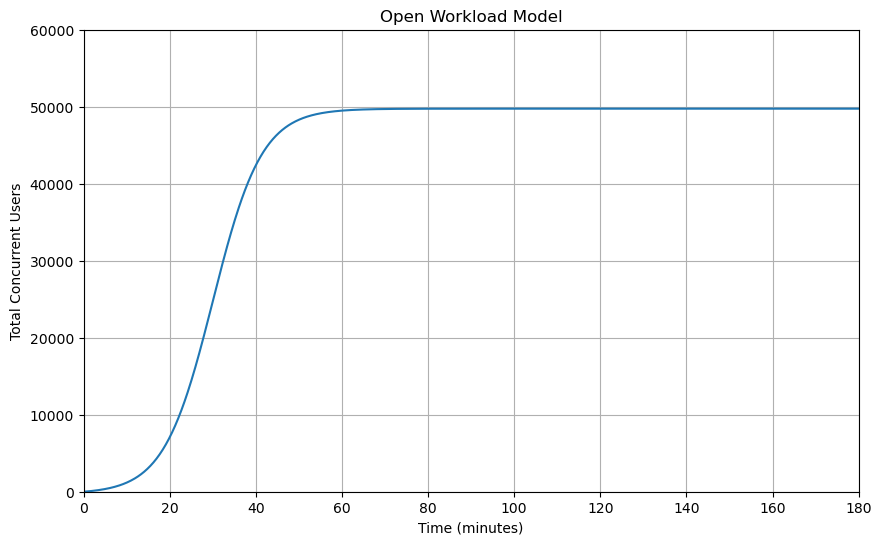

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

# Define the adjusted logistic function
def adjusted_logistic_function(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0))) - L / (1 + np.exp(k * t0))

# Define the shared parameters
L = 50000  # Total User Target
simulation_time = 180  # Simulation Time
k = 0.176
t0 = (ramp_time / 2)

# Define the time points to evaluate the function at
t = np.linspace(0, simulation_time, 1000)

# Number of concurrent users
users = adjusted_logistic_function(t, L, k, t0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, users)

# Add labels and title
plt.title('Open Workload Model')
plt.xlabel('Time (minutes)')
plt.ylabel('Total Concurrent Users')
plt.grid(True)
plt.xlim(0, simulation_time)
plt.ylim(0, L + 10000)
plt.show()


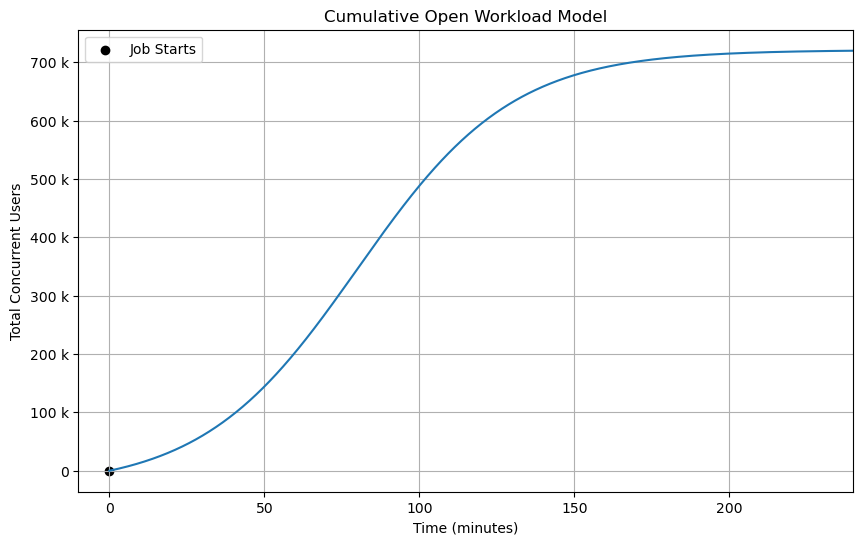

Cumlative Open Workload Model Curve Fitted Parameters
k: 0.04
t0: 80.0
total users: 720000


In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

# Define the adjusted logistic function
def adjusted_logistic_function(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0))) - L / (1 + np.exp(k * t0))


# Define the shared parameters
ramp_time = 60  # Ramp Time
simulation_time = 240  # Simulation Time
k = 0.04
t0 = 80

# Define the Total User Targets for the closed workload models
L_values = [50000, 60000, 60000, 
            80000, 50000, 60000, 
            60000, 80000, 20000, 
            100000, 100000]

# Calculate the value of the logistic function at the end of the simulation time for a single job
end_value = logistic_function(simulation_time, L_values[0], k, t0)

# Calculate the scaling factor
scaling_factor = L_values[0] / end_value

# Scale up the L_values
L_values_scaled = [L * scaling_factor for L in L_values]

# Define the time points to evaluate the function at
t = np.linspace(0, simulation_time, 1000)

# Calculate the total number of users at each time point for all jobs
cumulative_users = np.sum([adjusted_logistic_function(t, L, k, t0) for L in L_values_scaled], axis=0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, cumulative_users)

plt.scatter(0, 0, marker='o', color='black', label='Job Starts')

ax = plt.gca()
formatter = ticker.EngFormatter()
formatter.ENG_PREFIXES[-6] = 'K'
ax.yaxis.set_major_formatter(formatter)

# Add labels and title
plt.title('Cumulative Open Workload Model')
plt.xlabel('Time (minutes)')
plt.ylabel('Total Concurrent Users')
plt.grid(True)
plt.xlim(-10, simulation_time)
plt.legend()
plt.show()


# Provide initial guesses for the parameters L, k, and t0
L_init = np.sum(L_values)
k_init = 0.1
t0_init = simulation_time / 2


# Fit the adjusted logistic function to the original data
popt, _ = curve_fit(adjusted_logistic_function, t, cumulative_users, p0=[L_init, k_init, t0_init])

# Extract the values of L, k, and t0 from the fitted parameters
L_fit, k_fit, t0_fit = popt

# Print the values of k and t0
print("Cumlative Open Workload Model Curve Fitted Parameters")
print("k:", k_fit)
print("t0:", t0_fit)
print("total users:", sum(L_values))
